# VERİ SETİNE İLK BAKIŞ VE ÖN İŞLEME

In [1]:
import os
import pandas as pd

data_dir = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/"

data = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".png"):
            image_path = os.path.join(root, file)
            label = os.path.basename(root)
            data.append([image_path, label])

df = pd.DataFrame(data, columns=['image_path', 'label'])
print(df.head())


                                          image_path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


In [2]:
# Tüm benzersiz etiketleri görüntüleyelim
print(df['label'].unique())


['Hourse Mackerel' 'Hourse Mackerel GT' 'Black Sea Sprat GT'
 'Black Sea Sprat' 'Sea Bass' 'Sea Bass GT' 'Red Mullet' 'Red Mullet GT'
 'Trout' 'Trout GT' 'Striped Red Mullet GT' 'Striped Red Mullet'
 'Shrimp GT' 'Shrimp' 'Gilt-Head Bream GT' 'Gilt-Head Bream'
 'Red Sea Bream' 'Red Sea Bream GT']


In [3]:
print(df['label'].value_counts())

label
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Red Sea Bream            1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Shrimp                   1000
Shrimp GT                1000
Striped Red Mullet       1000
Striped Red Mullet GT    1000
Trout GT                 1000
Trout                    1000
Red Mullet GT            1000
Red Mullet               1000
Sea Bass GT              1000
Sea Bass                 1000
Black Sea Sprat          1000
Black Sea Sprat GT       1000
Red Sea Bream GT         1000
Name: count, dtype: int64


# ANN modeli sayısal verilerle çalıştığı için etiketleri integer değere dönüştürme


In [4]:
# Benzersiz etiketleri integer'a dönüştürmek için mapping oluşturma
label_mapping = {label: idx for idx, label in enumerate(df['label'].unique())}

# DataFrame'deki etiketleri (label) integer formatına çevirme
df['label'] = df['label'].map(label_mapping)

# Mapping'i ve güncellenmiş DataFrame'i kontrol edelim
print("Label Mapping:", label_mapping)
print(df.head())  # Güncellenmiş DataFrame'i görüntüleme


Label Mapping: {'Hourse Mackerel': 0, 'Hourse Mackerel GT': 1, 'Black Sea Sprat GT': 2, 'Black Sea Sprat': 3, 'Sea Bass': 4, 'Sea Bass GT': 5, 'Red Mullet': 6, 'Red Mullet GT': 7, 'Trout': 8, 'Trout GT': 9, 'Striped Red Mullet GT': 10, 'Striped Red Mullet': 11, 'Shrimp GT': 12, 'Shrimp': 13, 'Gilt-Head Bream GT': 14, 'Gilt-Head Bream': 15, 'Red Sea Bream': 16, 'Red Sea Bream GT': 17}
                                          image_path  label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...      0


# MODEL EĞİTİM AŞAMASI

# Veriyi eğitim ve test olarak bölme

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol edelim
print(f"Eğitim seti boyutu: {len(train_df)}")
print(f"Test seti boyutu: {len(test_df)}")


Eğitim seti boyutu: 14400
Test seti boyutu: 3600


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_mapping), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,301,010 (24.04 MB)

 Trainable params: 6,301,010 (24.04 MB)

 Non-trainable params: 0 (0.00 B)

# Modeli eğitmek için veri hazırlığı

In [7]:
def process_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [128, 128])
    img = img / 255.0
    return img, label

train_dataset = tf.data.Dataset.from_tensor_slices((train_df['image_path'].values, train_df['label'].values))
train_dataset = train_dataset.map(process_image).batch(32).shuffle(1000)

test_dataset = tf.data.Dataset.from_tensor_slices((test_df['image_path'].values, test_df['label'].values))
test_dataset = test_dataset.map(process_image).batch(32)


# Model Eğitimi

In [8]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.2926 - loss: 2.5100 - val_accuracy: 0.4761 - val_loss: 1.5029
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.5382 - loss: 1.2822 - val_accuracy: 0.6142 - val_loss: 1.0802
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.6399 - loss: 0.9823 - val_accuracy: 0.6397 - val_loss: 1.0832
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 64ms/step - accuracy: 0.6915 - loss: 0.8525 - val_accuracy: 0.6769 - val_loss: 0.8952
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.7388 - loss: 0.7056 - val_accuracy: 0.7036 - val_loss: 0.8431
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.7549 - loss: 0.6618 - val_accuracy: 0.6844 - val_loss: 0.9043
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.7782 - loss: 0.6044 - val_accuracy: 0.6931 - val_loss: 0.9546
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8053 - loss: 0.5263 - 

# MODELİN DEĞERLENDİRİLMESİ


# KAYIP FONKSİYONU VE DOĞRULUK GRAFİĞİ ÇİZME (overfitting kontrolü)

In [9]:
import matplotlib.pyplot as plt


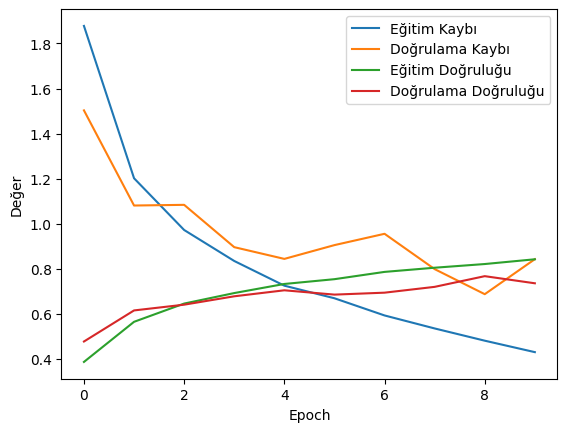

In [10]:
# Kayıp ve doğruluk grafikleri
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Değer')
plt.legend()
plt.show()


# Yukarıdaki grafiği incelediğimizde overfitting'in gerçekleşmediğini gözlemleyebiliriz

# 1.Eğitim ve doğrulama kayıpları birlikte azalıyor.
# 2.Eğitim ve doğrulama doğruluğu dengeli bir şekilde artıyor.
# 3.Doğrulama kaybında küçük dalgalanmalar var, ancak bu normal kabul edilir**

# Confusion Matrix ve Classification Report

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Test setindeki tahminleri alıyoruz
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(model.predict(test_dataset), axis=1)

# Confusion matrix ve classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step
Confusion Matrix:
[[195   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   2   0]
 [  0 126  27   0   0   5   0  16   0   9  13   0   3   0   1   0   0   0]
 [  0   5 139   0   0   6   0  12   0   1  11   0  26   0   0   0   0   0]
 [ 21   0   0 164   0   0   0   0   8   0   0   5   0   0   0   0   2   0]
 [ 16   0   0  13 136   0   7   0   5   0   0   9   0   3   0   7   4   0]
 [  0  13   8   0   0 142   0  12   0   7  13   0   5   0   0   0   0   0]
 [  4   0   0   0   0   0 169   0   0   0   0   5   0   7   0  14   1   0]
 [  0  15  32   0   0  10   0 104   0   4  12   0  22   0   1   0   0   0]
 [ 13   0   0   3   3   0   0   0 171   0   0   3   0   0   0   6   1   0]
 [  0  15   0   0   0  23   1   0   0 130   2   0   1   0  22   0   0   6]
 [  0  12  44   0   0  11   0  11   0   0 106   0  16   0   0   0   0   0]
 [  8   0   0   3   0   0   0   0  10   0   0 163   0   0   0   3  13   0]
 [  0   0  20   0   0   2   0   7   0   

# Hiperparametre Optimizasyonu

Hiperparametre optimizasyonu uzun sürdüğü için rastgele 5 arama ile sınırlandırılmıştır

In [12]:
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

# Model oluşturma fonksiyonu
def build_model(layers=2, nodes=128, optimizer_name='adam', dropout_rate=0.2, lr=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(128, 128, 3)))

    for _ in range(layers):
        model.add(Dense(nodes, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(len(label_mapping), activation='softmax'))

    optimizer = Adam(learning_rate=lr) if optimizer_name == 'adam' else RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hiperparametre seçenekleri
layer_options = [2, 3]
node_options = [128, 256]
optimizer_names = ['adam', 'rmsprop']
dropout_rates = [0.2, 0.3]
learning_rates = [0.001, 0.0005]
epochs = [10, 15]
batch_sizes = [16, 32]

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

best_accuracy = 0
best_params = {}

for _ in range(5):  # 5 rastgele kombinasyon
    layers = random.choice(layer_options)
    nodes = random.choice(node_options)
    optimizer_name = random.choice(optimizer_names)
    dropout_rate = random.choice(dropout_rates)
    lr = random.choice(learning_rates)
    epoch = random.choice(epochs)
    batch_size = random.choice(batch_sizes)

    print(f"Testing: layers={layers}, nodes={nodes}, optimizer={optimizer_name}, "
          f"dropout={dropout_rate}, learning_rate={lr}, epochs={epoch}, batch_size={batch_size}")

    model = build_model(layers, nodes, optimizer_name, dropout_rate, lr)
    history = model.fit(train_dataset, validation_data=test_dataset,
                        epochs=epoch, batch_size=batch_size, verbose=0, callbacks=[early_stopping])

    val_accuracy = max(history.history['val_accuracy'])

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = {
            'layers': layers,
            'nodes': nodes,
            'optimizer': optimizer_name,
            'dropout_rate': dropout_rate,
            'learning_rate': lr,
            'epochs': epoch,
            'batch_size': batch_size
        }

print(f"En iyi doğruluk: {best_accuracy * 100:.2f}%")
print(f"En iyi parametreler: {best_params}")


Testing: layers=3, nodes=128, optimizer=adam, dropout=0.3, learning_rate=0.001, epochs=15, batch_size=16


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Testing: layers=2, nodes=128, optimizer=rmsprop, dropout=0.2, learning_rate=0.0005, epochs=15, batch_size=32
Testing: layers=3, nodes=128, optimizer=rmsprop, dropout=0.2, learning_rate=0.001, epochs=15, batch_size=16
Testing: layers=3, nodes=256, optimizer=adam, dropout=0.3, learning_rate=0.0005, epochs=15, batch_size=32
Testing: layers=2, nodes=128, optimizer=rmsprop, dropout=0.2, learning_rate=0.0005, epochs=15, batch_size=32
En iyi doğruluk: 35.25%
En iyi parametreler: {'layers': 2, 'nodes': 128, 'optimizer': 'rmsprop', 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'epochs': 15, 'batch_size': 32}


Doğruluğun %50 civarında kalmasının nedeni, hiperparametre optimizasyon sürecinde yalnızca 5 rastgele kombinasyon denenmiş olmasıdır. Daha fazla parametre kombinasyonu denenemediği için model, optimal ayarları bulamamış olabilir. Ayrıca epoch sayısının düşük tutulması veya veri kümesinin karmaşıklığı da model performansını sınırlamış olabilir. Eğer daha fazla kombinasyon ve epoch ile deneme yapılırsa doğruluk oranının artması beklenir.